# Introduction:
Problem of smoking is pretty common around the world, but recently it started to begin more and more actual. Nowadays a huge amount of people smoking all around the world, causing health issues for them and destroying the ecology itself. I found this problem very important and I think the it should be discussed more often, and not being treated as insignificant. The death rate from lung cancer have been increasing through last years, so I believe that such problem is caused by increasing of smoking people all around the world. In that project I would like to analyze if there is a relation between these datasets, fit a model to it and see if its accurate enough to state that for example in society with 30% of smokers there will be a same percentage of Lung Cancer rate

# Datasets:
To make this project, I found 2 datasets and merged them. 

First one is all about smoking rates by countries in 2021. Including total and male/female percentage of smokers.

https://worldpopulationreview.com/country-rankings/smoking-rates-by-country?fbclid=IwAR3mVCs6WBWEJcxovEI_3jaQFTXwKf8fg6Mk73E8FCVOw-ABXydy4oXlqnY

The second one is describing the percentage of lung cancers death rate. Also rated by countries. Although some of countries presented in first dataset are not included in second one, but I will proceed this issue during processing data in code.

https://www.worldlifeexpectancy.com/cause-of-death/lung-cancers/by-country/


To be sure in the relevance of data, both of datasets are for the same year, 2021. I have decided to use only one column in the second dataset, which is responsible for both sex percentage of Lung cancers.

Before we proceed into the whole models, you can suggest that it is obvious that “the more countries smoke, the more is their lung cancer rate”, but let me assure that such statement is not valid for every case of our dataset, and below you will see that by your own eyes.

The whole combined dataset can be found here (My GitHub repository for this project):

https://github.com/WhiteOwlhead/SADISM/blob/main/Smoking.csv

So, what will be included in this project:
-	Getting and proceeding dataset from mine Github repository.
-	Showing the initial data, creating needed dataset by choosing only important for our task columns and sorting this data.
-	Making the plot on 2D coordinate system.
-   Creating a linear model for it.
-	Apply SVR model.
-	Apply GML model.
-	Conclusion.

Resources I used to do this project:

-	https://byes.pl/wp-content/uploads/systemy/SADiSM_lab_2_III16_15.ipynb
-	https://byes.pl/wp-content/uploads/systemy/SADiSM_lab_3_IV13_15.ipynb
-	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
-	https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



# Getting and proceeding dataset:

In [1]:
import urllib.request
import os
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/WhiteOwlhead/SADISM/main/Smoking.csv", 'Smoking.csv')
dataframe = pd.read_csv('Smoking.csv').dropna()
dataframe.sample(20)

,country,totalSmokingRate,maleSmokingRate,femaleSmokingRate,totalLungCancerRate
101,Canada,14.95,17.7,12.2,29.64
34,Poland,28.05,32.4,23.7,36.90
91,Singapore,16.50,28.0,5.0,22.32
72,Ireland,22.15,22.4,21.9,25.88
11,Croatia,36.45,39.4,33.5,33.85
107,Costa Rica,13.40,18.5,8.3,6.82
18,Laos,32.85,56.6,9.1,14.26
93,Iceland,16.05,17.0,15.1,25.17
97,Zambia,15.55,26.5,4.6,2.13
51,China,24.70,47.6,1.8,36.21


As I mentioned before, I will use only total smoking rate and total lung cancer rate, so I extract only two columns from this dataset and created a new dataframe. Then I decided to sort it both by total smoking rate, and then by total lung cancer rate. During the creation of this dataframe, I also dropped rows with Na in total lung cancer rate.

Our main table, that we will work with, will be sorted by total smoking rate, which will be used as x axis.

In [2]:
sub_dataframe = pd.DataFrame(dataframe[["country","totalSmokingRate","totalLungCancerRate"]]).dropna()


totalSmokingSort = sub_dataframe.sort_values(by=["totalSmokingRate"], ascending=False)
print("Sorted by total Smoking: \n")
print(totalSmokingSort)

totalLungSort = sub_dataframe.sort_values(by=["totalLungCancerRate"], ascending=False)
print("Sorted by total Lung cancer rate: \n")
print(totalLungSort)

Sorted by total Smoking: 

      country  totalSmokingRate  totalLungCancerRate
0    Kiribati             52.40                16.62
2      Greece             42.65                31.80
3      Serbia             41.65                37.09
4      Russia             40.90                26.70
5      Jordan             40.45                12.23
..        ...               ...                  ...
122   Ecuador              8.65                 6.73
123  Barbados              7.00                 8.91
124     Ghana              6.75                 2.43
125    Panama              6.60                 8.87
126  Ethiopia              4.70                 3.34

[123 rows x 3 columns]
Sorted by total Lung cancer rate: 

      country  totalSmokingRate  totalLungCancerRate
32    Hungary             28.40                48.21
3      Serbia             41.65                37.09
34     Poland             28.05                36.90
51      China             24.70                36.21
11    Croati

As we can see, it looks like my assumption before was correct. Because the countries with high total smoking rate is not also with high total lung cancer rate. Also, we can state that the model will probably have a big error, as some of the cases are inconsistent.

Let us proceed to drawing a plot

# Making the plot on 2D coordinate system:

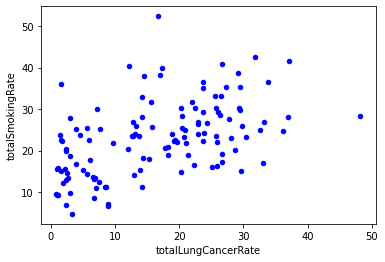

In [6]:
import matplotlib.pyplot as plt
import numpy as np

totalSmokingSort.plot(kind="scatter",x="totalSmokingRate",y="totalLungCancerRate",color="blue")
#plt.xticks(rotation="vertical")
plt.show()

#The code belove is to see the plot drawn on total Lung cancer rate as x axis
totalSmokingSort.plot(kind="scatter",x="totalLungCancerRate",y="totalSmokingRate",color="blue")
plt.show()

Looking at our graphs, we can say that they are both similar, but we will work only with first one.
Also, even if x axis seems to be fine by itself, the lung cancer rate values are 'divided' into two groups, the first one seems to be a consistant, while other is spread all around the y axis.

# Creating a linear model:

Mean squared error = 84.67828202250206
Model parameters = [0.60353276], 2.5052325547169154


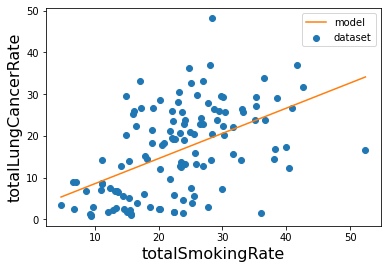

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=totalSmokingSort['totalSmokingRate'].values
y=totalSmokingSort['totalLungCancerRate'].values
model = LinearRegression()
model.fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))

x_min = totalSmokingSort['totalSmokingRate'].min()
x_max = totalSmokingSort['totalSmokingRate'].max()
x_plot = np.linspace(x_min, x_max, 300)
y_pred_plot = model.predict(x_plot.reshape(-1,1))

plt.scatter(x,y, label='dataset')
plt.plot(x_plot, y_pred_plot, color='tab:orange', label='model')
plt.xlabel(totalSmokingSort.columns[1], fontsize=16)
plt.ylabel(totalSmokingSort.columns[2], fontsize=16)

plt.legend()
plt.show()

print("Mean squared error = {}".format(mean_squared_error(y, model.predict(x.reshape(-1,1)))))
print("Model parameters = {}, {}".format(model.coef_,model.intercept_))

Despite the fact, that our linear regression seems to be fine, our mean squared error shows us, that this graph is not ideal at all. We can see that some values are pretty far away from prediction line, which show us, that we can not depend on this model, or even use it in some disputes. It is worth to mention that linear regression in a simplified version is y=ax+b, and our model parameters are (a) and (b), which are printed above the graph.

# Apply SVR model:

Mean squared error = 82.54999455216286


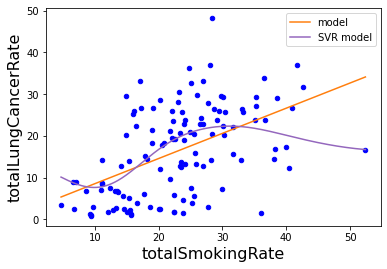

In [7]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr = model_svr.fit(x.reshape(-1,1), y)
y_svr_pred_plot = model_svr.predict(x_plot.reshape(-1,1))

totalSmokingSort.plot(kind="scatter",x="totalSmokingRate",y="totalLungCancerRate",color="blue")
plt.xlabel(totalSmokingSort.columns[1], fontsize=16)
plt.ylabel(totalSmokingSort.columns[2], fontsize=16)

plt.plot(x_plot, y_pred_plot, color='tab:orange', label='model')
plt.plot(x_plot, y_svr_pred_plot, color='tab:purple', label='SVR model')


plt.legend()
plt.show()


print("Mean squared error = {}".format(mean_squared_error(y, model_svr.predict(x.reshape(-1,1)))))

SVR uses the same basic idea as Support Vector Machine (SVM), but applies it to predict real values, not a class. SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model. 
While linear regression models minimize the error between the actual and predicted values through the line of best fit, SVR manages to fit the best line within a threshold of values.

As we can see here, our SVR model at the middle of our graph seems more precise than our linear regression due to the lower mean squared error, which shows us that the model is closer to most of data on the graph.

# Apply GML model:

Model GLM params: [ 0.00000000e+00 -3.43643085e-01  9.02769141e-02 -2.46012991e-03
  1.85318265e-05], 2.7782902472159403


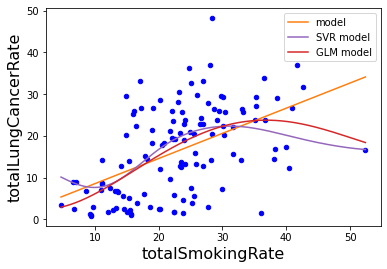

In [9]:
from sklearn.preprocessing import PolynomialFeatures

preX = PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)
Xtransformed = preX.fit_transform(x.reshape(-1,1))


model_GLM = LinearRegression()
model_GLM.fit(Xtransformed, y)

Xtransformed = preX.fit_transform(x_plot.reshape(-1,1))
y_pred_GLM_plot = model_GLM.predict(Xtransformed)

totalSmokingSort.plot(kind="scatter",x="totalSmokingRate",y="totalLungCancerRate",color="blue")
plt.xlabel(totalSmokingSort.columns[1], fontsize=16)
plt.ylabel(totalSmokingSort.columns[2], fontsize=16)

plt.plot(x_plot, y_pred_plot, color='tab:orange', label='model')
plt.plot(x_plot, y_svr_pred_plot, color='tab:purple', label='SVR model')
plt.plot(x_plot, y_pred_GLM_plot, color='tab:red', label='GLM model')


plt.legend()
plt.show()

print('Model GLM params: {}, {}'.format(model_GLM.coef_, model_GLM.intercept_))

Generalized linear model is elastic generalization of our simple linear regression that allows for response variables that have error distribution models other than a normal ones. GLM simplifies linear regression by allowing the linear model to be related to the response variable by a link function and by allowing the great size of the variance of each measurement to be a function of its predicted value.

Comparing our GLM model to our previous models, I believe that the GLM is the most precise one of others, because it's line is closer to our data and looks more adequate from others.

Also we need to remember, that degree of GLM allows us to modify a model in that way, that it will look more fittable or exactly opposite (in case of worng degree). 

# Here is an example of wrong degree interpretation:

Model GLM params: [ 0.00000000e+00 -4.56226714e+01  7.52386698e+00 -6.21484656e-01
  2.86031910e-02 -7.38588879e-04  9.95657872e-06 -5.43128564e-08], 108.8463387015313


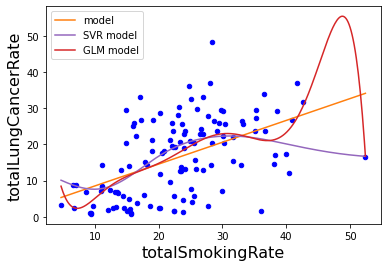

In [10]:
from sklearn.preprocessing import PolynomialFeatures

preX = PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)
Xtransformed = preX.fit_transform(x.reshape(-1,1))


model_GLM = LinearRegression()
model_GLM.fit(Xtransformed, y)

Xtransformed = preX.fit_transform(x_plot.reshape(-1,1))
y_pred_GLM_plot = model_GLM.predict(Xtransformed)

totalSmokingSort.plot(kind="scatter",x="totalSmokingRate",y="totalLungCancerRate",color="blue")
plt.xlabel(totalSmokingSort.columns[1], fontsize=16)
plt.ylabel(totalSmokingSort.columns[2], fontsize=16)

plt.plot(x_plot, y_pred_plot, color='tab:orange', label='model')
plt.plot(x_plot, y_svr_pred_plot, color='tab:purple', label='SVR model')
plt.plot(x_plot, y_pred_GLM_plot, color='tab:red', label='GLM model')


plt.legend()
plt.show()

print('Model GLM params: {}, {}'.format(model_GLM.coef_, model_GLM.intercept_))

# Conclusion:

As we can see, from all models, the most suitable was GLM model. Despite the fact, that it depends on right degree choice, it appeared to be more accurate than others. If we divide our graph in two parts, the first one (x axis from 0-30) we can see, that our linear regression is fine, while on second part (x axis from 30-60), the data is located in such a way, that SVR and GLM models are going down, while our linear regression still going up, making it unrelevant in that part. I assume that SVR model is better than our linear regression, but it still has huge error mean value, even if it is lower than in linear regression. We need to remember, that still these are models with big error values, and we can not treat them as a good prediction of relation of total smoking rate and total lung cancer rate.

As I writed at the start of my project, the data itself is not such simple as assumption about “the more countries smoke, the more is their lung cancer rate”. The plot itself showed us that this data is partly unconsistent, making finding the suitable graph a hard work. All in all I can say, that still there is a weak corelation between those two data, but it is not enough to state that the more pople smoke, the more people are getting lung cancer, making us to think that there is much more aspects need to be taken into consideration.